In [8]:
import platform
import os
import numpy as np
import tensorflow as tf
import keras
from keras import layers

gpu_token = tf.test.is_gpu_available('GPU')

if platform.machine() == 'x86_64':
    if gpu_token:
        os.chdir('/home/ucdasec/Faulthunter-RNN-approach')
    else:
        os.chdir("/home/sakshmeno/Documents/GitHub/C-RNN-approach")
elif platform.machine() == 'arm64':
    os.chdir("/Users/saksh.menon/Documents/GitHub/C-RNN-approach")

from Utils.dataframe_gen import *
from Utils.OneHot_gen import *
from Utils.TFIDF_gen import *
from Utils.word2vec_gen import *
from Utils.vector_gen import *
from Utils.metrics_summary import *

from Models.RNN_paper_prototype import *


2024-03-19 16:11:47.698208: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-19 16:11:47.698252: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-19 16:11:47.699305: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-19 16:11:47.705239: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-19 16:11:48.365660: W tensorflow/compiler/tf2

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2024-03-19 16:11:49.020058: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-19 16:11:49.056229: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-19 16:11:49.056414: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [9]:
original_df = dataframe_init(gpu_token)
vectors = vec_split(original_df)
word2vec_init(original_df, vectors, gpu_token)
tensors = tensor_gen(vectors)

2024-03-19 16:11:54.662152: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-19 16:11:54.662374: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-19 16:11:54.662520: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [10]:
model = model_ver_0(vectors[0]['Encoded Lines'][0].shape[0])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 218, 1024)         1050624   
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 218, 1024)         2098176   
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 1024)              2098176   
                                                                 
 dense (Dense)               (None, 1024)              1049600   
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_3 (Dense)             (None, 2)                 2

In [5]:
model = keras.Sequential()

model.add(layers.Input((vectors[0]['Encoded Lines'][0].shape[0], 1)))
model.add(layers.SimpleRNN(256, return_sequences=True, dropout=0.4))
model.add(layers.SimpleRNN(256, return_sequences=True, dropout=0.4))
model.add(layers.SimpleRNN(256, dropout=0.4))
model.add(layers.Dense(256, activation=keras.activations.relu, kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(layers.Dense(256, activation=keras.activations.relu, kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(layers.Dense(256, activation=keras.activations.relu, kernel_regularizer=keras.regularizers.l2(0.01)))        
model.add(layers.Dense(2, activation = keras.activations.softmax))

model.compile(optimizer=keras.optimizers.legacy.Adam(learning_rate=0.01), loss=keras.losses.binary_crossentropy,
            metrics=["accuracy"], run_eagerly=True)


In [11]:
history = model.fit(tensors[0], tensors[3], epochs=200, validation_data=(tensors[1],tensors[4]))
y_pred = model.predict(tensors[2])

Epoch 1/200
115/115 [==============================] - 140s 1s/step - loss: 23.5319 - accuracy: 0.9745 - val_loss: 16.8270 - val_accuracy: 1.0000
Epoch 2/200
115/115 [==============================] - 138s 1s/step - loss: 12.4949 - accuracy: 0.9786 - val_loss: 8.6571 - val_accuracy: 1.0000
Epoch 3/200
115/115 [==============================] - 138s 1s/step - loss: 6.3315 - accuracy: 0.9786 - val_loss: 4.2320 - val_accuracy: 1.0000
Epoch 4/200
115/115 [==============================] - 138s 1s/step - loss: 3.0822 - accuracy: 0.9786 - val_loss: 1.9896 - val_accuracy: 1.0000
Epoch 5/200
115/115 [==============================] - 138s 1s/step - loss: 1.4596 - accuracy: 0.9786 - val_loss: 0.8857 - val_accuracy: 1.0000
Epoch 6/200
115/115 [==============================] - 138s 1s/step - loss: 0.6980 - accuracy: 0.9786 - val_loss: 0.3886 - val_accuracy: 1.0000
Epoch 7/200
115/115 [==============================] - 138s 1s/step - loss: 0.3600 - accuracy: 0.9786 - val_loss: 0.1776 - val_accura

In [18]:
y_pred = model.predict(tensors[2])

33/33 [==============================] - 24s 738ms/step


In [19]:
classify = lambda x : int(x[0]<x[1])
classified_outputs = list(map(classify, y_pred))
classified_labels = list(map(classify, tensors[3]))

In [32]:
score_summary(classified_labels, classified_outputs, 0)
true_positives, true_negetives, false_positives, false_negetives = true_false_computation(classified_labels, classified_outputs, 0)
print('true_positives: {}\ntrue_negetives: {}\nfalse_positives: {}\nfalse_negetives: {}\n'.format(true_positives, true_negetives, false_positives, false_negetives))
print('#########################################\n')
score_summary(classified_labels, classified_outputs, 1)
true_positives, true_negetives, false_positives, false_negetives = true_false_computation(classified_labels, classified_outputs, 1)
print('true_positives: {}\ntrue_negetives: {}\nfalse_positives: {}\nfalse_negetives: {}\n'.format(true_positives, true_negetives, false_positives, false_negetives))


For secure:
f1 score:  0.9898206495395055
precision score:  0.9798464491362764
recall score:  0

true_positives: 1021
true_negetives: 0
false_positives: 21
false_negetives: 0

#########################################

For insecure:
f1 score:  0.0
precision score:  0
recall score:  0.0

true_positives: 0
true_negetives: 1021
false_positives: 0
false_negetives: 21



In [34]:
c=0
for i in vectors[1]['Label']:
    if i == [0,1]:
        c+=1
print(c)


0


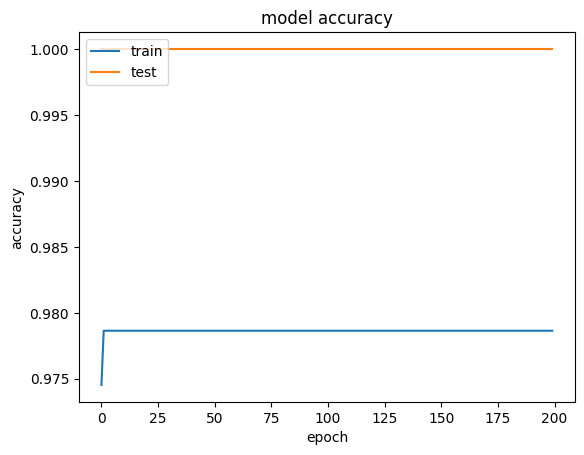

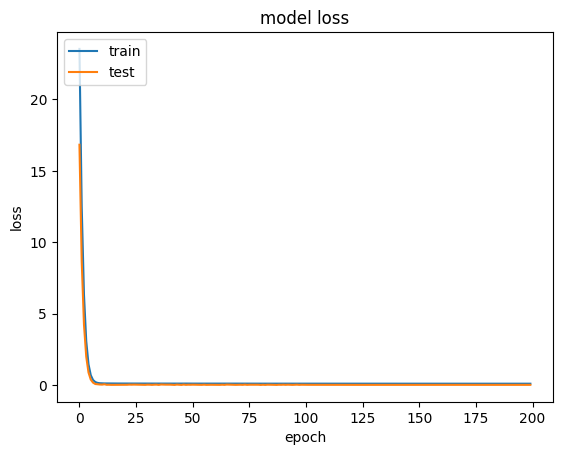

In [14]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [39]:
!nvidia-smi

Wed Mar 20 12:57:30 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.147.05   Driver Version: 525.147.05   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:02:00.0 Off |                  N/A |
| 28%   30C    P8     5W / 151W |   7694MiB /  8192MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
!git pull

remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), 1.68 KiB | 1.68 MiB/s, done.
From https://github.com/sakshmenon/Faulthunter-RNN-approach
   7590d50..f89c940  dev        -> origin/dev
Updating c62e40a..f89c940
Fast-forward
 Models/RNN_paper_prototype.py                      |      2 +-
 .../RNN_paper_prototype.cpython-310.pyc            |    Bin 2408 -> 2408 bytes
 Scripts/tester.ipynb                               |  83913 ++++-
 Scripts/vec_playground.ipynb                       | 308708 +++++++++++++++++-
 Utils/__pycache__/dataframe_gen.cpython-310.pyc    |    Bin 5455 -> 5447 bytes
 Utils/__pycache__/vector_gen.cpython-310.pyc       |    Bin 2707 -> 3093 bytes
 Utils/__pycache__/word2vec_gen.cpython-310.pyc     |    Bin 2596 -> 2604 bytes
 Utils/dataframe_gen.py                             |      2 +-
 Utils/vec